<a href="https://colab.research.google.com/github/Martlgap/x-face-verification/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prerequisites

In [ ]:
# Prerequisites
!git clone https://github.com/Martlgap/x-face-verification.git
!pip install -r x-face-verification/requirements.txt
!wget https://github.com/Martlgap/octuplet-loss/releases/download/modelweights/ArcFaceOctupletLoss.tf.zip -P x-face-verification/demo
!unzip x-face-verification/demo/ArcFaceOctupletLoss.tf.zip -d x-face-verification/demo

Cloning into 'x-face-verification'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 92 (delta 36), reused 67 (delta 19), pack-reused 0
Unpacking objects: 100% (92/92), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 497.6 MB 2.0 kB/s 
     |████████████████████████████████| 5.8 MB 62.5 MB/s 
     |████████████████████████████████| 1.4 MB 60.8 MB/s 
     |████████████████████████████████| 462 kB 77.8 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0


In [3]:
# Add the Repo to PYTHONPATH
import os
os.environ['PYTHONPATH'] += ":/content/x-face-verification"

In [ ]:
# Set the Repo as working directory
%cd x-face-verification/

# Example for Confidence Score Calculation

Imports

In [40]:
import pickle
from src import ConfidenceScoreGenerator, calculate_score
from sklearn.metrics.pairwise import paired_cosine_distances

Load example embedddings and labels (Generated for XQLFW database utilizing a FaceTransformer model fine-tuned with OctupletLoss)

In [41]:
with open("./demo/embeddings1.pkl", "rb") as f:
    embeddings1 = pickle.load(f)
with open("./demo/embeddings2.pkl", "rb") as f:
    embeddings2 = pickle.load(f)
with open("./demo/labels.pkl", "rb") as f:
    labels = pickle.load(f)

Calculate Confidence Score

In [43]:
# Calculate pairwise cosine distances
distances = paired_cosine_distances(embeddings1, embeddings2)

# Define a threshold for binary decision
THRESHOLD = 0.2250

# Initiate the confidence calculation with the distances, labels and threshold of a dataset
ConfidenceScoreGenerator = ConfidenceScoreGenerator()
sigmoid_parameters = ConfidenceScoreGenerator(cosine_distances=distances, labels=labels, threshold=THRESHOLD)

# Calculate scores for specific pairs
PAIR_ID = 0
confidence_score_raw = calculate_score(sigmoid_parameters, distances[PAIR_ID])
confidence_score = (confidence_score_raw if distances[PAIR_ID] < THRESHOLD else 1 - confidence_score_raw) * 100

# Display result
print(
    f'The prediction: "{distances[PAIR_ID] < THRESHOLD}" for pair id: {PAIR_ID} '
    f"has a confidence score of: {confidence_score:.02f}%."
    )

The prediction: "True" for pair id: 0 has a confidence score of: 99.97%.


/content/x-face-verification/src/calculate_score.py:48: RuntimeWarning: invalid value encountered in true_divide
  y1 = np.nan_to_num(counts_pos / (counts_pos + counts_neg), nan=1)[:int(threshold / (2 / self.bins))]
/content/x-face-verification/src/calculate_score.py:49: RuntimeWarning: invalid value encountered in true_divide
  y2 = np.nan_to_num(counts_pos / (counts_pos + counts_neg), nan=0)[int(threshold / (2 / self.bins)):]


# Example for Generation Explanation Maps

Imports

In [8]:
import matplotlib.pyplot as plt
import cv2
from src import MapGenerator, colorblend
from demo import ArcFaceOctupletLoss

Load example pair of images

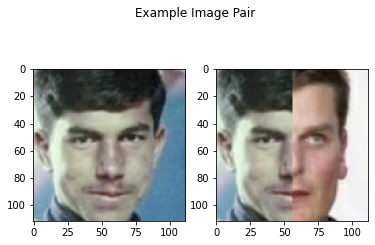

In [9]:
image_pair = (
    cv2.cvtColor(cv2.imread("./demo/img1.png"), cv2.COLOR_BGR2RGB) / 255,
    cv2.cvtColor(cv2.imread("./demo/img2.png"), cv2.COLOR_BGR2RGB) / 255,
)

# Show example image pair
fig, ax = plt.subplots(1, 2)
fig.suptitle("Example Image Pair")
ax[0].imshow(image_pair[0]), ax[1].imshow(image_pair[1])
fig.show()

Generate Explanation Maps

Performing Inference: 100%|██████████| 5/5 [00:00<00:00,  9.40it/s]


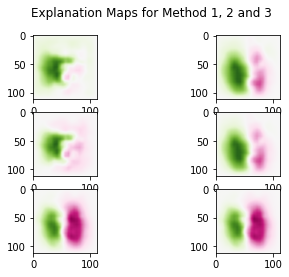

In [10]:
# Instantiate the MapGenerator
MapGenerator = MapGenerator(inference_fn=ArcFaceOctupletLoss(batch_size=64))

# Generate and visualize the explanation maps
fig, ax = plt.subplots(3, 2)
fig.suptitle("Explanation Maps for Method 1, 2 and 3")
print("Method 1:")
map1_m1, map2_m1 = MapGenerator(*image_pair, method="1")  # using method 1 for explanation maps
ax[0, 0].imshow(map1_m1), ax[0, 1].imshow(map2_m1)
print("Method 2:")
map1_m2, map2_m2 = MapGenerator(*image_pair, method="2")  # using method 2 for explanation maps
ax[1, 0].imshow(map1_m2), ax[1, 1].imshow(map2_m2)
print("Method 3:")
map1_m3, map2_m3 = MapGenerator(*image_pair, method="3")  # using method 3 for explanation maps
ax[2, 0].imshow(map1_m3), ax[2, 1].imshow(map2_m3)
plt.show()

Blend the explanations maps with the original images and visualize

error: ignored

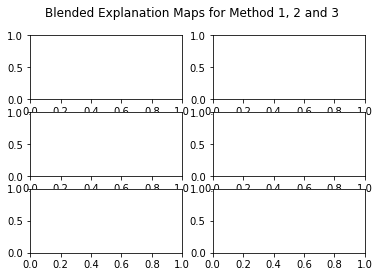

In [19]:
fig, ax = plt.subplots(3, 2)
fig.suptitle("Blended Explanation Maps for Method 1, 2 and 3")
ax[0, 0].imshow(colorblend(image_pair[0], map1_m1)), ax[0, 1].imshow(colorblend(image_pair[1], map2_m1))
ax[1, 0].imshow(colorblend(image_pair[0], map1_m2)), ax[1, 1].imshow(colorblend(image_pair[1], map2_m2))
ax[2, 0].imshow(colorblend(image_pair[0], map1_m3)), ax[2, 1].imshow(colorblend(image_pair[1], map2_m3))
plt.show()

fatal: not a git repository (or any of the parent directories): .git
